[[[ 19.057098 371.3457  ]]

 [[ 68.45039  566.2142  ]]

 [[ 81.25368  475.67923 ]]]
[[[ 17.05909  619.6093  ]]

 [[637.35693   62.176914]]

 [[ 70.19359  617.2111  ]]]
[[[ -36.10371  596.195  ]]

 [[ 275.48175  766.39124]]

 [[-149.94281  748.4117 ]]

 [[ -22.70389  287.4632 ]]]


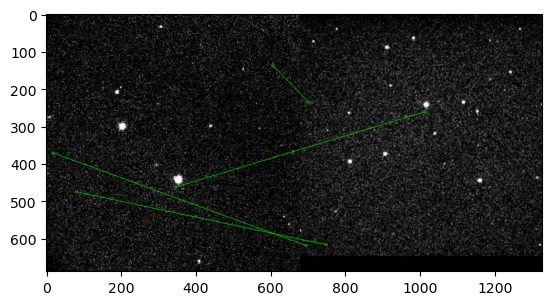

In [14]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

img1 = cv2.imread('11.7homew1.jpg')
img2 = cv2.imread('11.7homew2.jpg')

sift = cv2.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

print(src_pts[:3])
print(dst_pts[:3])

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

h,w = img1.shape[0:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
print(dst)

# Display the object
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches,None,**draw_params)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.savefig('11.7homew3.jpg')

In [8]:
pip install imageio

In [16]:
import imageio # 导入imageio库
 
def creat_gif(image_list, gif_name, duration = 2):
    """
    生成gif文件，原始图像仅仅支持png格式；
    gif_name : 字符串，所生成的gif文件名，带.gif文件名后缀；
    path : 输入图像的路径；
    duration : gif图像时间间隔，这里默认设置为1s,当然你喜欢可以设置其他；
    """
    # 创建一个空列表，用来存源图像
    frames = []
    
    # 利用方法append把图片挨个存进列表
    
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
 
    # 保存为gif格式的图
    imageio.mimsave(gif_name, frames, 'GIF', duration = duration)
 
    return
    
def main():
    # 自己收集的图片，当然这里也可以爬取网上的图像，加载进来
    image_list = ['11.7homew1.jpg', '11.7homew2.jpg', '11.7homew3.jpg'] # 源图像，可以随便选取哈
    gif_name = '11.7homew.gif'
    duration = 1.5
    creat_gif(image_list, gif_name)
if __name__ == "__main__":
    main()

C:\Users\张艳眉\AppData\Local\Temp\ipykernel_28320\1101708849.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(image_name))


[[ 6.87722951e-02 -1.24273581e+00  6.71000000e+02]
 [ 8.66486286e-02  4.83370157e-02  3.14000000e+02]
 [-7.63013127e-04 -3.68781623e-04  1.00000000e+00]]


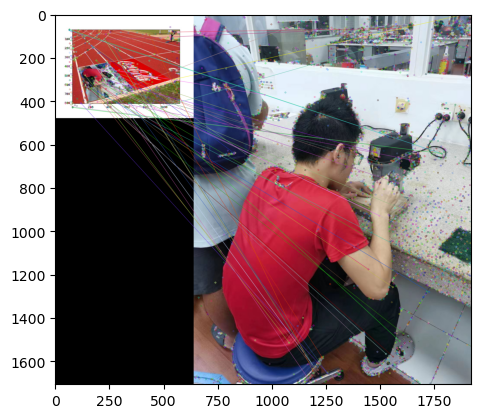

In [28]:
#课堂小练
img1 = cv2.imread('images/track.jpg')
img2 = cv2.imread('images/logo.jpg')
rows1,cols1,ch1 = img1.shape
rows2,cols2,ch2 = img2.shape

img4 = cv2.imread('siwei.jpg')
rows3,cols3,ch3 = img4.shape

pts1 = np.float32([(0,0),(cols2-1,0),(cols2-1,rows2-1),(0,rows2-1)])
pts2 = np.float32([(671,314),(1084,546),(689,663),(386,361)])
pts3 = np.float32([(0,0),(cols3-1,0),(cols3-1,rows3-1),(0,rows3-1)])
pts4 = np.float32([(386,361),(689,663),(180,790),(71,420)])

M = cv2.getPerspectiveTransform(pts1,pts2)
L = cv2.getPerspectiveTransform(pts3,pts4)
print (M)
img3 = np.copy(img1)
img5 = np.copy(img1)
img6=cv2.warpPerspective(img2,M,(cols1,rows1),img3,borderMode=cv2.BORDER_TRANSPARENT)
cv2.warpPerspective(img4,L,(cols1,rows1),img6,borderMode=cv2.BORDER_TRANSPARENT)

plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.savefig('siwei2.jpg')

img7= cv2.imread('siwei2.jpg')
sift = cv2.SIFT_create()
gray1 = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
        
img8 = cv2.drawMatches(img7, kp1, img4, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img8, cv2.COLOR_BGR2RGB))